In [45]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import sys
import warnings
import pickle
import argparse
from multiprocess import Pool

# enter your exotic-ld path if it isn't already defined in your 
# environment variables. 
os.environ['EXO_LD_PATH'] = '/Users/tylergordon/research/exotic_ld_data'

from fit import fit_joint_wlc, fit_joint_spec
from plot_utils import get_wl_models, get_canonical_params
from distributions import *
import sys_params
import plot_utils

def load_all(base_dir, prefix):

    time = np.load(base_dir + prefix + '_times_bjd.npy')
    time_offset = time[0]
    time -= time[0]
    spec = np.load(base_dir + prefix + '.npy')
    cube = np.load(base_dir + prefix + '_cleaned_cube.npy')
    wavs = np.load(base_dir + prefix + '_wav.npy')

    return time, wavs, spec, cube, time_offset

def fit_wrapper(base_dirs, prefixes, detector):

    times = []
    cubes = []
    specs = []
    wavs = []
    for b, p in zip(basedirs, prefixes):
        t, w, s, cube, to = load_all(b, p)
        cubes.append(cube)
        times.append(t - to)
        specs.append(s)
        wavs.append(w)

    to = times[0][0]
    for i in range(len(times)):
        times[i] -= to

    sort = np.argsort([t[0] for t in times])
    times = [times[i] for i in sort]
    cubes = [cubes[i] for i in sort]
    specs = [specs[i] for i in sort]
    wavs = [wavs[i] for i in sort]
    
    joint_results = fit_joint_wlc(
        times, 
        specs, 
        wavs, 
        priors_dict, 
        st_params_dict,
        [detector] * len(prefixes), 
        cubes=cubes,
        gp=False, 
        n_components=6,
        samples=1000, 
        burnin=0,
        thin=1,
        nproc=2,
        save_chains=False,
        return_chains=True,
        polyorder=2,
        progress=True
    )

    return joint_results

In [46]:
target = '402.01'
visits = ['T1']
basedir = '/Users/tylergordon/research/compass/targets/'

basedirs = [basedir + target + '/' + v + '/reduction/stage3/' for v in visits]
prefixes_nrs1 = [target + '_' + v + '_nrs1' for v in visits]
prefixes_nrs2 = [target + '_' + v + '_nrs2' for v in visits]

# define priors for the planet's parameters. Use the 
# priors defined in distributions.py
priors_dict = sys_params.priors_dict[target]

# stellar parameters for computing priors 
# on the limb-darkening coefficients
st_params_dict = sys_params.stellar_params_dict[target]

result_nrs1 = fit_wrapper(basedirs, prefixes_nrs1, 'nrs1')
result_nrs2 = fit_wrapper(basedirs, prefixes_nrs2, 'nrs2')

100%|███████████████████████████████████████| 1000/1000 [00:25<00:00, 39.57it/s]


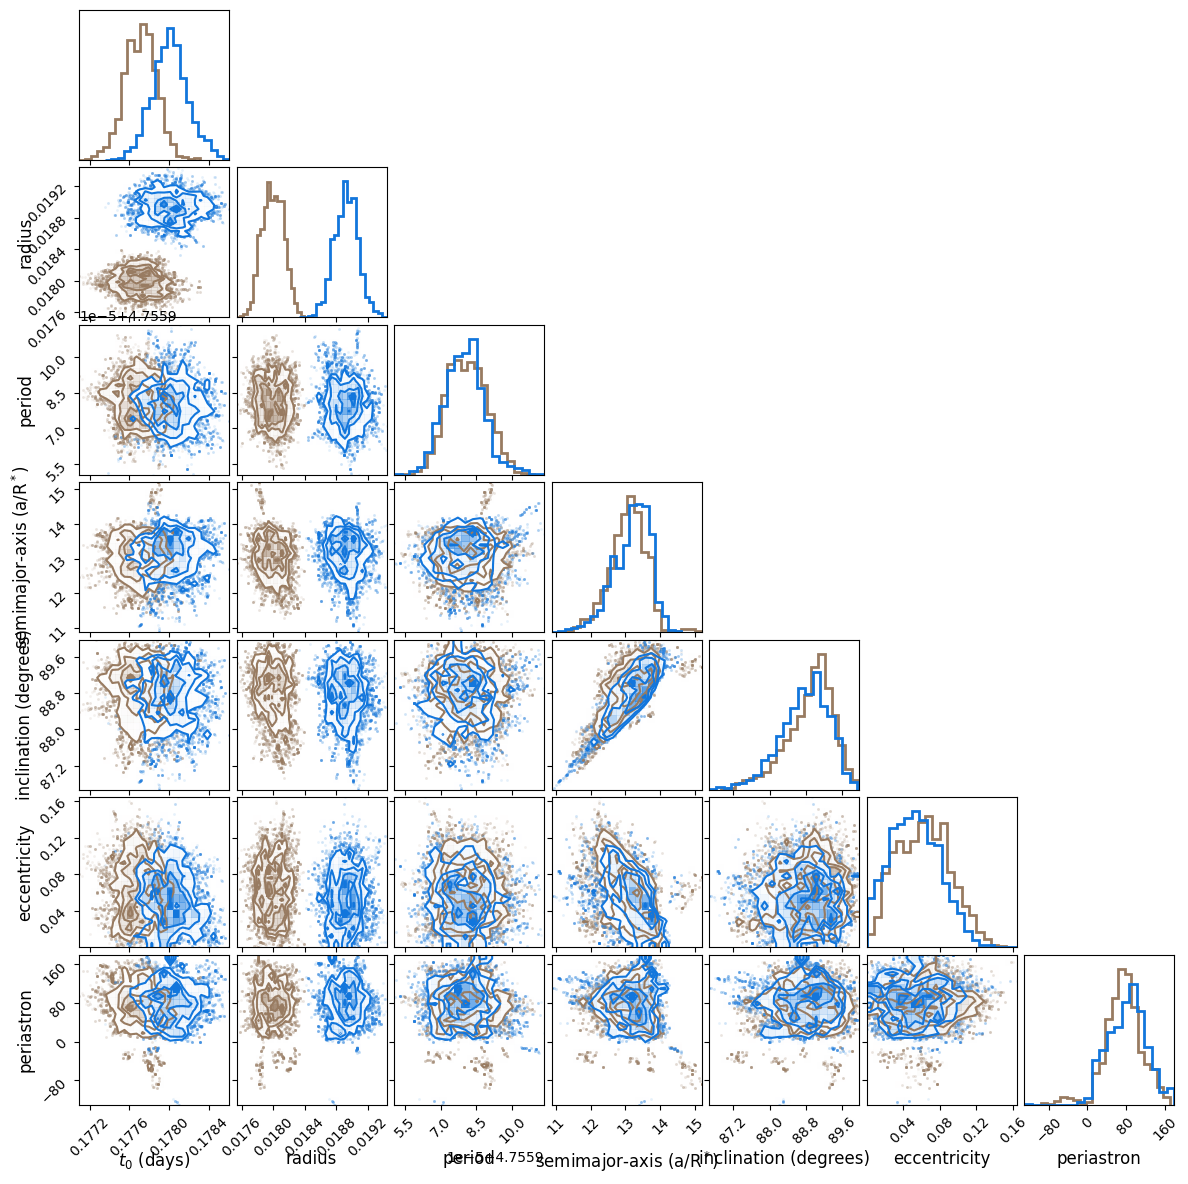

In [47]:
fig = plt.figure(figsize=(12, 12))
plot_utils.plot_corner(result_nrs1[0], fig=fig, burnin=500, color=plt.cm.terrain(0.7));
plot_utils.plot_corner(result_nrs2[0], fig=fig, burnin=500, color=plt.cm.terrain(0.1));

In [87]:
import imp
import fit
import spec_joint
imp.reload(spec_joint)
imp.reload(fit)
from fit import fit_joint_spec

fit_spec_wrapper = lambda result: fit_joint_spec(
    result,
    pix_per_bin=30, 
    samples=100, 
    burnin=50,  
    nproc=12, 
    n_components=1,
    save_chains=False,
    return_chains=True,
    gp=False,
    #polyorder=2,
    progress=True
)

results_spec_nrs1 = fit_spec_wrapper(result_nrs1)
results_spec_nrs2 = fit_spec_wrapper(result_nrs2)

running bands 1-12 of 41                                    

 99%|█████████▉| 99/100 [00:01<00:00, 67.34it/s]

running bands 13-24 of 41                                   

100%|██████████| 100/100 [00:01<00:00, 64.85it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:267: UserWarning: resource_tracker: '/loky-15397-dohz7es6': [Errno 2] No such file or directory
  warnings.warn('resource_tracker: %r: %s' % (name, e))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 lea

running bands 25-36 of 41                                   

100%|██████████| 100/100 [00:01<00:00, 68.13it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appea

running bands 37-41 of 41                                   

100%|██████████| 100/100 [00:01<00:00, 67.73it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appea

running bands 1-12 of 67                                    

100%|██████████| 100/100 [00:01<00:00, 70.01it/s]


running bands 13-24 of 67                                   

100%|██████████| 100/100 [00:01<00:00, 66.58it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appea

running bands 25-36 of 67                                   

100%|██████████| 100/100 [00:01<00:00, 67.82it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appea

running bands 37-48 of 67                                   

100%|██████████| 100/100 [00:01<00:00, 67.30it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
100%|██████████| 100/100 [00:01<00:00, 68.70it/s]


running bands 49-60 of 67                                   

100%|██████████| 100/100 [00:01<00:00, 67.58it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
100%|██████████| 100/100 [00:01<00:00, 67.65it/s]


running bands 61-67 of 67                                   

100%|██████████| 100/100 [00:01<00:00, 70.52it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
100%|██████████| 100/100 [00:01<00:00, 86.54it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.

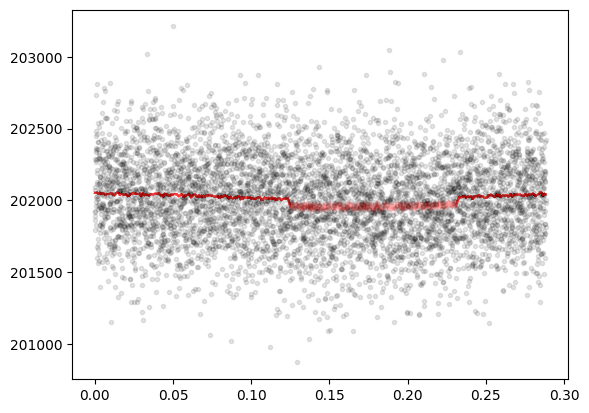

In [88]:
import imp
import fit
imp.reload(plot_utils)
from plot_utils import get_spec_models

# this is the index of the spectral bin you want to plot
ind = 28
# this is the index of the transit for the multi-transit case (i.e. 0=first transit, 1=second transit, etc)
tind = 0

trans, sys, f = get_spec_models(results_spec_nrs2, ind, tind, nsamples=200)
time = results_spec_nrs2['wl_results'][tind]['time']
lc = results_spec_nrs2['lightcurves'][tind][:, ind]
mask = results_spec_nrs2['wl_results'][tind]['mask']
plt.plot(time[~mask], lc[~mask], '.', color='k', alpha=0.1)
plt.plot(time[~mask], trans.T + sys.T, 'r', alpha=0.01);

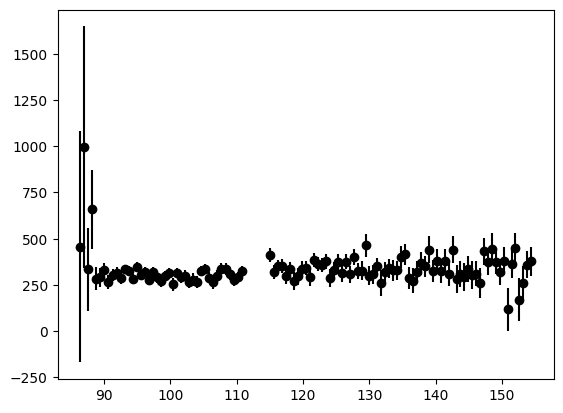

In [89]:
for chains, wavs in zip([results_spec_nrs1['chains'], results_spec_nrs2['chains']], [results_spec_nrs1['wavs'], results_spec_nrs2['wavs']]):
    dep = np.array([np.mean(r.get_chain()[:, :, -3], axis=(0, 1)) for r in chains])
    dep_err = np.array([np.std(r.get_chain()[:, :, -3], axis=(0, 1)) for r in chains])
    plt.plot(wavs, dep**2 * 1e6, 'o', color='k')
    plt.errorbar(wavs, dep ** 2 * 1e6, yerr=2 * dep * dep_err * 1e6, ls='none', color='k')

In [ ]:
result_nrs1[0]['detrending_vectors'].shape